In [33]:
import matplotlib.pyplot as plt
import json
from pprint import pprint
import numpy as np

with open('phystech/data/contest_input.json', 'r') as f:
    data = json.loads(f.read())
    
pprint(data['orders'][:10])

[{'dropoff_from': 600,
  'dropoff_location_x': 252,
  'dropoff_location_y': 197,
  'dropoff_point_id': 60001,
  'dropoff_to': 960,
  'order_id': 10001,
  'payment': 313,
  'pickup_from': 480,
  'pickup_location_x': 284,
  'pickup_location_y': 235,
  'pickup_point_id': 40001,
  'pickup_to': 570},
 {'dropoff_from': 630,
  'dropoff_location_x': 24,
  'dropoff_location_y': 105,
  'dropoff_point_id': 60002,
  'dropoff_to': 660,
  'order_id': 10002,
  'payment': 519,
  'pickup_from': 420,
  'pickup_location_x': 244,
  'pickup_location_y': 262,
  'pickup_point_id': 40002,
  'pickup_to': 450},
 {'dropoff_from': 1050,
  'dropoff_location_x': 115,
  'dropoff_location_y': 38,
  'dropoff_point_id': 60003,
  'dropoff_to': 1080,
  'order_id': 10003,
  'payment': 380,
  'pickup_from': 390,
  'pickup_location_x': 225,
  'pickup_location_y': 141,
  'pickup_point_id': 40003,
  'pickup_to': 1020},
 {'dropoff_from': 420,
  'dropoff_location_x': 236,
  'dropoff_location_y': 165,
  'dropoff_point_id': 60004

In [57]:
np.mean([10 + abs(o['pickup_location_x'] - o['dropoff_location_x'])
           + abs(o['pickup_location_y'] - o['dropoff_location_y'])for o in data['orders']])

152.89935642886485

In [60]:
np.std([10 + abs(o['pickup_location_x'] - o['dropoff_location_x'])
           + abs(o['pickup_location_y'] - o['dropoff_location_y'])for o in data['orders']])

87.85667861893523

In [59]:
np.mean([o['pickup_to'] - o['pickup_from'] for o in data['orders']])

265.7533890182117

In [61]:
np.std([o['pickup_to'] - o['pickup_from'] for o in data['orders']])

223.75382801561025

In [63]:
np.mean([o['dropoff_to'] - o['dropoff_from'] for o in data['orders']])

146.91565110228674

In [64]:
np.std([o['dropoff_to'] - o['dropoff_from'] for o in data['orders']])

95.94721468118411

In [48]:
data['orders'][709]

{'order_id': 10710,
 'pickup_point_id': 40710,
 'pickup_from': 420,
 'pickup_to': 450,
 'pickup_location_x': 331,
 'pickup_location_y': 6,
 'dropoff_point_id': 60710,
 'dropoff_from': 1219,
 'dropoff_to': 540,
 'dropoff_location_x': 311,
 'dropoff_location_y': 150,
 'payment': 520}

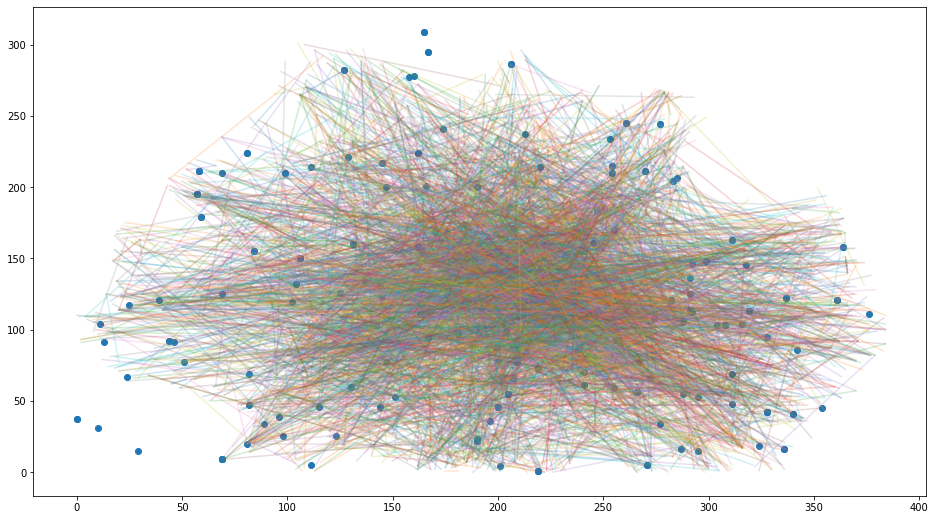

In [67]:
from tqdm import tqdm_notebook

plt.figure(figsize=(16, 9))

s = 0

for i, o in tqdm_notebook(enumerate(data['orders'])):
    #if 500 < i < 600:
    #    break
    
    if not o['pickup_from'] < 500 < o['pickup_to']:
        continue
    s += 1
    
    plt.plot([o['pickup_location_x'], o['dropoff_location_x']],
             [o['pickup_location_y'], o['dropoff_location_y']], alpha=0.2)
    

plt.scatter([c['location_x'] for c in data['couriers']],
            [c['location_y'] for c in data['couriers']])

In [54]:
s

4040

In [74]:
pprint(data.keys())
pprint(data['couriers'][:5])
pprint(data['depots'][:5])
pprint(data['orders'][:5])

dict_keys(['couriers', 'depots', 'orders'])
[{'courier_id': 1, 'location_x': 111, 'location_y': 5},
 {'courier_id': 2, 'location_x': 260, 'location_y': 112},
 {'courier_id': 3, 'location_x': 207, 'location_y': 66},
 {'courier_id': 4, 'location_x': 288, 'location_y': 55},
 {'courier_id': 5, 'location_x': 253, 'location_y': 234}]
[{'location_x': 241, 'location_y': 109, 'point_id': 30001},
 {'location_x': 188, 'location_y': 134, 'point_id': 30002},
 {'location_x': 204, 'location_y': 99, 'point_id': 30003},
 {'location_x': 241, 'location_y': 155, 'point_id': 30004},
 {'location_x': 223, 'location_y': 105, 'point_id': 30005}]
[{'dropoff_from': 600,
  'dropoff_location_x': 252,
  'dropoff_location_y': 197,
  'dropoff_point_id': 60001,
  'dropoff_to': 960,
  'order_id': 10001,
  'payment': 313,
  'pickup_from': 480,
  'pickup_location_x': 284,
  'pickup_location_y': 235,
  'pickup_point_id': 40001,
  'pickup_to': 570},
 {'dropoff_from': 630,
  'dropoff_location_x': 24,
  'dropoff_location_y':

courier_id location_x location_y

In [96]:
s = ''
for category in sorted(data.keys()):
    t = ''
    t += str(len(data[category])) + '\n'
    for j in data[category]:
        t += ' '.join([str(j[k]) for k in sorted(data[category][0].keys())])
        t += '\n'
                 
    s += t
s = s[:-1]

In [97]:
with open('data.txt', 'w') as f:
    f.write(s)

In [99]:
sorted(data.keys())

['couriers', 'depots', 'orders']

In [103]:
sorted(data['orders'][0].keys())

['dropoff_from',
 'dropoff_location_x',
 'dropoff_location_y',
 'dropoff_point_id',
 'dropoff_to',
 'order_id',
 'payment',
 'pickup_from',
 'pickup_location_x',
 'pickup_location_y',
 'pickup_point_id',
 'pickup_to']

In [107]:
for i in ['dropoff_from',
 'dropoff_location_x',
 'dropoff_location_y',
 'dropoff_point_id',
 'dropoff_to',
 'order_id',
 'payment',
 'pickup_from',
 'pickup_location_x',
 'pickup_location_y',
 'pickup_point_id',
 'pickup_to']:
    print(f'>> order.{i}', end=' ')

>> order.dropoff_from >> order.dropoff_location_x >> order.dropoff_location_y >> order.dropoff_point_id >> order.dropoff_to >> order.order_id >> order.payment >> order.pickup_from >> order.pickup_location_x >> order.pickup_location_y >> order.pickup_point_id >> order.pickup_to 